In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


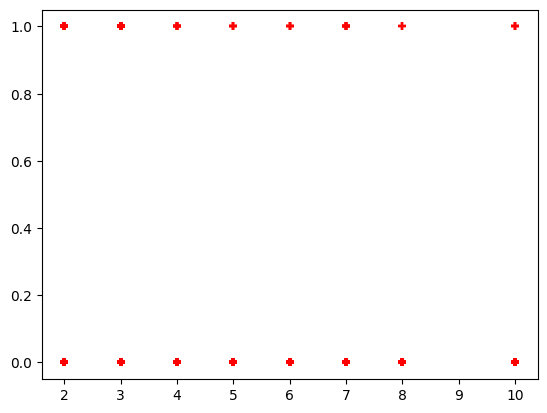

In [7]:
plt.scatter(df.time_spend_company, df.promotion_last_5years, marker="+", color="red")

In [8]:
df.shape

(14999, 10)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[["time_spend_company"]], df.promotion_last_5years, train_size=0.8)

In [11]:
X_test

,time_spend_company
2507,2
11379,4
1541,4
12867,3
4975,4
...,...
14698,4
12395,3
4402,3
58,3


In [12]:
X_train

,time_spend_company
2915,6
13192,3
5517,2
13454,3
8337,3
...,...
1648,4
1727,4
13046,3
3694,6


In [15]:
X_test

,time_spend_company
2507,2
11379,4
1541,4
12867,3
4975,4
...,...
14698,4
12395,3
4402,3
58,3


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_predicted = model.predict(X_test)

In [17]:
model.predict_proba(X_test)

array([[0.98577278, 0.01422722],
       [0.97805516, 0.02194484],
       [0.97805516, 0.02194484],
       ...,
       [0.98232292, 0.01767708],
       [0.98232292, 0.01767708],
       [0.97278557, 0.02721443]])

In [18]:
model.score(X_test, y_test)

0.9773333333333334

In [20]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
X_test

,time_spend_company
2507,2
11379,4
1541,4
12867,3
4975,4
...,...
14698,4
12395,3
4402,3
58,3


## **model.coef_ indicates value of m in y=m*x + b equation**

In [22]:
model.coef_

array([[0.22061737]])

## **model.intercept_ indicates value of b in y=m*x + b equation**

In [23]:
model.intercept_

array([-4.67950336])

## **Lets defined sigmoid function now and do the math with hand**

In [24]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [27]:
def prediction_function(time_spend_company):
    z = 0.042 * time_spend_company - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y 

In [32]:
time_spend_company = 5
prediction_function(time_spend_company)

0.21081829347774714

##  **0.21 is less than 0.5 which means person with 5 years time_spend_company will *not* get a promotion in the last 5years**